In [1]:
from Polya import PolyaUrn, load_polya
import numpy as np
import matplotlib.pyplot as plt

In [5]:
p = load_polya('./polya_seq/polya_urn_len_100000_novelties_772_nu2_rho3_eta0.80.pkl')
p.load_extras('./polya_seq/polya_urn_len_100000_novelties_772_nu2_rho3_eta0.80_extras.pkl')

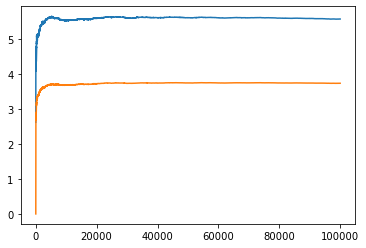

In [8]:
plt.plot(p.extras['seq_entropy'])
plt.plot(p.extras['seq_seen_entropy'])

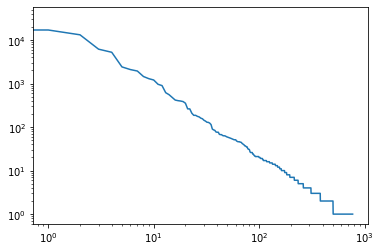

In [12]:
plt.loglog(p.zipf())

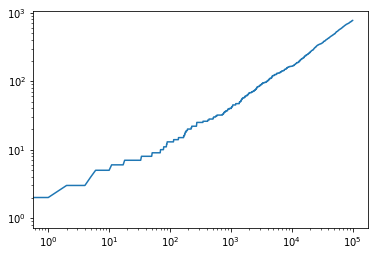

In [13]:
plt.loglog(p.heaps())

In [10]:
p.seq[:1000]

array([ 2,  5,  9,  5,  2,  7,  8,  2,  5,  9,  8,  4,  9,  8,  2,  2,  8,
        7, 19, 19,  5,  7,  9,  8,  8,  4,  4,  2,  2,  5,  9,  8,  2,  5,
       14,  9,  8,  8,  5,  2,  9,  2,  4,  2,  2,  7,  5,  8,  5,  2,  9,
        3,  9,  2,  4,  8,  7,  5,  2,  2,  2,  2,  9,  2,  2,  8,  8,  9,
        5,  2, 25,  5,  2,  8,  8,  8,  5,  8,  8, 28,  2,  2,  8,  8,  8,
        2,  2,  5, 18,  7, 17, 14, 18,  5,  8,  2,  5,  2,  5,  2,  2,  2,
        2,  8,  7,  5,  5,  2,  5,  2,  9,  2,  5,  9, 19, 32,  8,  2, 14,
        8,  8,  8, 14,  2,  2,  2,  2,  8,  2,  2,  9, 17,  5,  2,  2,  5,
        8,  2, 12,  5,  2,  5,  7,  8,  9,  2,  2, 25,  3,  2,  5,  9, 12,
        8,  9,  2,  9,  4,  2,  5,  9, 14,  2,  8,  2,  7,  3,  2,  6,  2,
        2,  2,  5, 18, 33,  2,  7,  9, 30, 19,  4,  2,  9,  9, 19, 38,  9,
        8,  5,  3,  8,  5,  2,  2, 58,  4,  2,  2,  2, 18,  2, 17,  9,  2,
        5,  5,  2,  6, 19,  5,  2,  8,  5,  9,  5,  5,  5,  6, 12,  2,  2,
        2,  2, 41,  5,  2

### Polya parameters

In [ ]:
init_balls_per_color = 1
init_colors = 5
nu = 2
rho = 3
eta = 0.8
#eta = 1.0
entropy_base = 2
seq_len=100000


### Instantiating Polya object

In [ ]:
p = PolyaUrn(rho=rho, nu=nu, eta=eta, entropy_base=entropy_base, init_colors=init_colors, 
             init_balls_per_color=init_balls_per_color)


In [ ]:
p.ind_colors

In [ ]:
print('Balls/Labels:', p.balls, p.labels)
print('Label distribution:', p.label_distribution)
print('Label 2 color:', p.label2color)
print('Color 2 label:', p.color2label)
print('Color 2 offspring:', p.color2offspring)
print('Label 2 parent color', p.label2parent_color)

In [ ]:
sam, nov = p.sample()
print(p.seq)
print('Sample:', sam, nov)
print('Balls :', p.balls)
print('Labels:', p.labels)
print('Label distribution:', p.label_distribution)
print('Label 2 color:', p.label2color)
print('Color 2 label:', p.color2label)
print('Color 2 offspring:', p.color2offspring)
print('Label 2 parent color', p.label2parent_color)
print(p.distribution)

In [ ]:
sam, nov = p.sample()

print('Sample:', sam, nov, 'Label:', p.labels[-1])
print(p.seq)
#print('Balls :', p.balls)
#print('Labels:', p.labels)
#print('Label distribution:', p.label_distribution)
#print('Label 2 color:', p.label2color)
#print('Color 2 label:', p.color2label)
#print('Color 2 offspring:', p.color2offspring)
#print('Label 2 parent color', p.label2parent_color)

In [ ]:
for k in range(10):
    sam, nov = p.sample()

#print('Sample:', sam, nov, 'Label:', p.labels[-1])
print(p.seq)

In [ ]:
p = PolyaUrn(rho=rho, nu=nu, eta=eta, entropy_base=entropy_base, init_colors=init_colors, 
             init_balls_per_color=init_balls_per_color)
p.get_sequence(seq_len=seq_len, get_seq_entropies=True, print_every=200)

### Polya's sequence

In [ ]:
p.get_sequence(seq_len=seq_len, get_seq_entropies=True, print_every=200)

In [ ]:
p.seq

Max element (color) in Polya sequence

In [ ]:
p.seq.max()

### Print Polya Urn info

In [ ]:
print(p)

### Calculate extras (entropies and distributions)

In [ ]:
p.get_entropy_and_distributions()

### Plotting entropies

In [ ]:
plt.plot(p.extras['seq_entropy'], label='Urn Entropy')
plt.plot(p.extras['seq_seen_entropy'], label='Sequence Entropy')
_ = plt.legend(loc='best')

### Plotting distributions at different steps

In [ ]:
steps = [0, 2, 10, 30, 60, 100]
width = 0.35
for step in steps:
    plt.figure(figsize=(20,6))
    ind = np.arange(p.extras['seq_distributions'][step].shape[0])
    plt.bar(ind, p.extras['seq_distributions'][step], width, label='Urn distribution at step '+str(step))
    plt.bar(ind+width, p.extras['seq_seen_distributions'][step], width, label='Sequence distribution at step '+str(step))
    _ = plt.legend(loc='best')
    plt.show()

### Zipf's and Heaps' distributions

In [ ]:
zipf = p.zipf()
plt.loglog(zipf)
plt.title('Zipf\'s distribution')
plt.show()

In [ ]:
heaps = p.heaps()
plt.loglog(heaps)
plt.title('Heaps\' distribution')
plt.show()

### Shuffling sequence elements

In [ ]:
new_seq = p.seq_color_shuffling(max_color=100000)

In [ ]:
print('Real sequence:', p.seq[:30], '\n')
print('Shuffled sequence:', new_seq[:30])

### Compacting sequence

In [ ]:
comp_seq = p.seq_compacting()

In [ ]:
print('Real sequence:', p.seq[:30], '\n')
print('Compacted sequence:', comp_seq[:30])

### Saving Polya

In [ ]:
p.save()

### Saving extras (entropies and distributions)

In [ ]:
p.save_extras()

### Load Polya without extras

In [ ]:
p1 = load_polya('./polya_seq/polya_urn_len_10000_novelties_335_nu2_rho3_eta1.pkl')

In [ ]:
print(p1)

### Loading Polya extras

In [ ]:
p1.load_extras('./polya_seq/polya_urn_len_10000_novelties_335_nu2_rho3_eta1_extras.pkl')

In [ ]:
print(p1)